In [13]:
%matplotlib widget
import niscope as ni
import matplotlib.pyplot as plt
import numpy as np
# 275 MHz MAX
# Molto probabilmente serve niscope.Session.acq_arm_source per comandare i trigger, perché c'è in tutte le opzioni dei trigger di readthedocs di niscope

#RICORDARSI DEL NOME!!!!!
with ni.Session("PXI1Slot3") as session: # Name of the device
    session.channels[0].configure_vertical(range=2.0, coupling=ni.VerticalCoupling.AC)
    session.configure_horizontal_timing(min_sample_rate=250e6, min_num_pts=1000, ref_position=0, num_records=1, enforce_realtime=True)
    session.configure_trigger_digital(trigger_source = 'VAL_PFI_0' , slope = ni.TriggerSlope.POSITIVE, holdoff=0, delay=0)
    with session.initiate():
        waveforms = session.channels[0].fetch()
    for wfm in waveforms:
        print('Channel {0}, record {1} samples acquired: {2:,}\n'.format(wfm.channel, wfm.record, len(wfm.samples)))
a = waveforms[0].samples.tolist()

Channel 0, record 0 samples acquired: 1,000



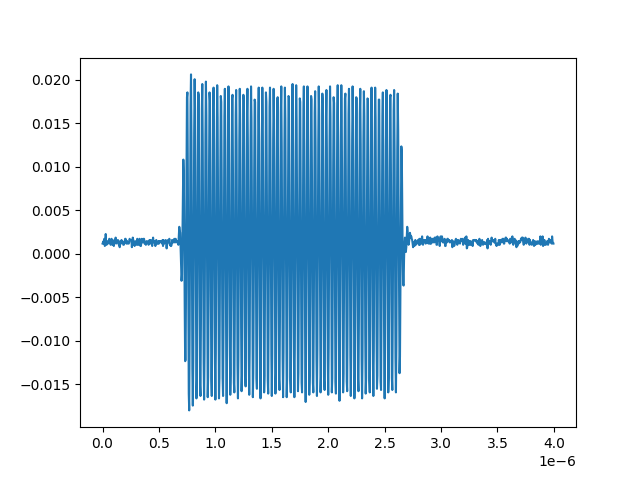

In [14]:
plt.clf()
x = np.arange(len(a))/250e6
y = a
plt.plot(x, y)
plt.show()

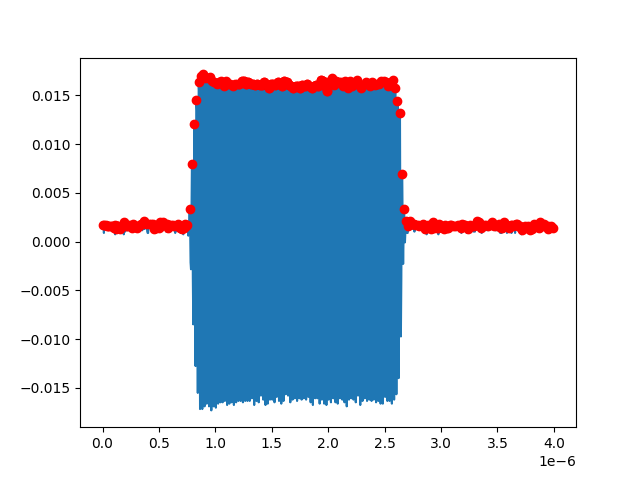

In [35]:
from scipy.signal import find_peaks

start = 100
finish = start + 1000

peakss = find_peaks(y)

peaks = peakss[0]

for j in peaks:
    plt.plot(x[j],y[j], color = 'red', linewidth=10, marker = 'o')

plt.show()

In [27]:
x

array([0.000e+00, 4.000e-09, 8.000e-09, 1.200e-08, 1.600e-08, 2.000e-08,
       2.400e-08, 2.800e-08, 3.200e-08, 3.600e-08, 4.000e-08, 4.400e-08,
       4.800e-08, 5.200e-08, 5.600e-08, 6.000e-08, 6.400e-08, 6.800e-08,
       7.200e-08, 7.600e-08, 8.000e-08, 8.400e-08, 8.800e-08, 9.200e-08,
       9.600e-08, 1.000e-07, 1.040e-07, 1.080e-07, 1.120e-07, 1.160e-07,
       1.200e-07, 1.240e-07, 1.280e-07, 1.320e-07, 1.360e-07, 1.400e-07,
       1.440e-07, 1.480e-07, 1.520e-07, 1.560e-07, 1.600e-07, 1.640e-07,
       1.680e-07, 1.720e-07, 1.760e-07, 1.800e-07, 1.840e-07, 1.880e-07,
       1.920e-07, 1.960e-07, 2.000e-07, 2.040e-07, 2.080e-07, 2.120e-07,
       2.160e-07, 2.200e-07, 2.240e-07, 2.280e-07, 2.320e-07, 2.360e-07,
       2.400e-07, 2.440e-07, 2.480e-07, 2.520e-07, 2.560e-07, 2.600e-07,
       2.640e-07, 2.680e-07, 2.720e-07, 2.760e-07, 2.800e-07, 2.840e-07,
       2.880e-07, 2.920e-07, 2.960e-07, 3.000e-07, 3.040e-07, 3.080e-07,
       3.120e-07, 3.160e-07, 3.200e-07, 3.240e-07, 

In [34]:
p = np.arange(10)
p[2:-2]

array([2, 3, 4, 5, 6, 7])

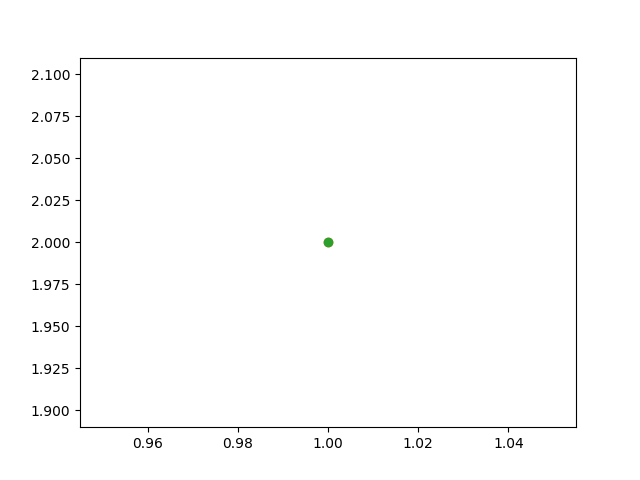

In [4]:
plt.plot(1,2, marker = 'o', linewidth = 10)
plt.show()

In [ ]:
sGen.pul_exe_sing_trig() # DA TESTARE

In [3]:
%matplotlib widget
import niscope as ni
import matplotlib.pyplot as plt
import numpy as np
 # 250 MHz MAX
# Molto probabilmente serve niscope.Session.acq_arm_source per comandare i trigger, perché c'è in tutte le opzioni dei trigger di readthedocs di niscope

#RICORDARSI DEL NOME!!!!!
with ni.Session("PXI1Slot3") as session: # Name of the device
    session.channels[0].configure_vertical(range=2.0, coupling=ni.VerticalCoupling.AC)
    session.configure_horizontal_timing(min_sample_rate=250e6, min_num_pts=int(1000), ref_position=0, num_records=1, enforce_realtime=True)
    session.configure_trigger_digital(trigger_source = 'VAL_PFI_0' , slope = ni.TriggerSlope.POSITIVE, holdoff=0, delay=0)
    with session.initiate():
        waveforms = session.channels[0].fetch()
    for wfm in waveforms:
        print('Channel {0}, record {1} samples acquired: {2:,}\n'.format(wfm.channel, wfm.record, len(wfm.samples)))
a = waveforms[0].samples.tolist()
plt.figure()
plt.plot(np.arange(len(a))/250e6, a)

DriverError: -1074126845: Maximum time exceeded before the operation completed.

Device: PXI1Slot3


In [5]:
import niscope as ni
import matplotlib.pyplot as plt

voltage_range = 2 # MAX 5V
n_pts = 1000
n_recs = 3

with ni.Session("PXI1Slot4") as session: # Name of the device
    session.channels[0].configure_vertical(range = voltage_range, coupling=ni.VerticalCoupling.AC)
    session.configure_horizontal_timing(min_sample_rate = 250e6, min_num_pts = n_pts, ref_position = 50.0, num_records = n_recs, enforce_realtime = True)
    with session.initiate(): # After calling this method, the digitizer leaves the Idle state and waits for a trigger
        waveforms = session.channels[0].fetch()
    for wfm in waveforms:
         print('Channel {0}, record {1} samples acquired: {2:,}\n'.format(wfm.channel, wfm.record, len(wfm.samples)))
a = waveforms[0].samples.tolist()

plt.plot(a)


DriverError: -1073807343: VISA:  (Hex 0xBFFF0011) Insufficient location information or the device or resource is not present in the system.

Invalid Identifier: PXI1Slot4

Available communication.
Channel 0, record 0 samples acquired: 500



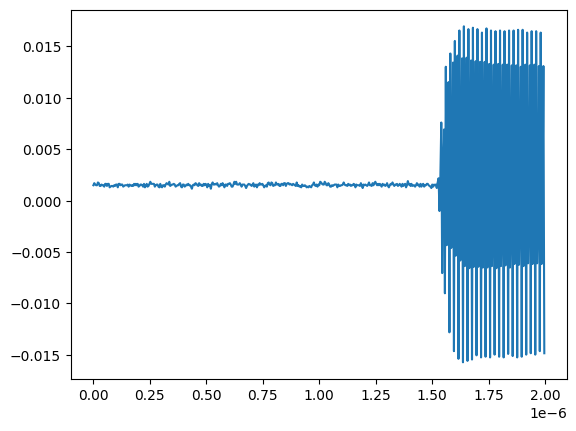

In [21]:
import Card_Class

pxie = Card_Class.PXIe5170R('PXI1Slot4')
pxie.available

# # read parameters
# print(pxie.voltage_range)
# print(pxie.sample_rate)
# print(pxie.coupling)
# print(pxie.num_pts)
# print(pxie.num_records)
# print(pxie.ref_position)

# # configure parameters
# pxie.voltage_range = 2 
# pxie.sample_rate = 69e6 
# pxie.coupling = 'AC' 
# pxie.num_pts = 1000 
# pxie.num_records = 2 
# pxie.ref_position = 60.5 

# # read again
# print(pxie.voltage_range)
# print(pxie.sample_rate)
# print(pxie.coupling)
# print(pxie.num_pts)
# print(pxie.num_records)
# print(pxie.ref_position)

# configure the acquisition
waveforms = pxie.acquisition()

for wfm in waveforms:
        print('Channel {0}, record {1} samples acquired: {2:,}\n'.format(wfm.channel, wfm.record, len(wfm.samples)))
a = waveforms[0].samples.tolist()

plt.plot(np.arange(len(a))/250e6, a)

